In [2]:
import pandas as pd
import numpy as np

In [3]:
data = 'wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'

In [4]:
!wget $data

Prepended http:// to 'wget'
--2025-10-13 23:15:49--  http://wget/
failed: nodename nor servname provided, or not known.
wget: unable to resolve host address ‘wget’
--2025-10-13 23:15:49--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
connected. to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... 
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.09s   

2025-10-13 23:15:49 (8.79 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]

FINISHED --2025-10-13 23:15:49--
Total wall clock time: 0.5s
Downloaded: 1 files, 854K in 0.09s (8.79 MB/s)


In [105]:
df = pd.read_csv('car_fuel_efficiency.csv.1')

In [106]:
df=df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

In [107]:
print(df.head(5))

   engine_displacement  horsepower  vehicle_weight  model_year  \
0                  170       159.0     3413.433759        2003   
1                  130        97.0     3149.664934        2007   
2                  170        78.0     3079.038997        2018   
3                  220         NaN     2542.392402        2009   
4                  210       140.0     3460.870990        2009   

   fuel_efficiency_mpg  
0            13.231729  
1            13.688217  
2            14.246341  
3            16.912736  
4            12.488369  


In [108]:
print(df.dtypes)

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
fuel_efficiency_mpg    float64
dtype: object


In [109]:
print(df.describe())

       engine_displacement   horsepower  vehicle_weight   model_year  \
count          9704.000000  8996.000000     9704.000000  9704.000000   
mean            199.708368   149.657292     3001.280993  2011.484027   
std              49.455319    29.879555      497.894860     6.659808   
min              10.000000    37.000000      952.681761  2000.000000   
25%             170.000000   130.000000     2666.248985  2006.000000   
50%             200.000000   149.000000     2993.226296  2012.000000   
75%             230.000000   170.000000     3334.957039  2017.000000   
max             380.000000   271.000000     4739.077089  2023.000000   

       fuel_efficiency_mpg  
count          9704.000000  
mean             14.985243  
std               2.556468  
min               6.200971  
25%              13.267459  
50%              15.006037  
75%              16.707965  
max              25.967222  


In [110]:
print(df.isnull().sum())

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64


In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

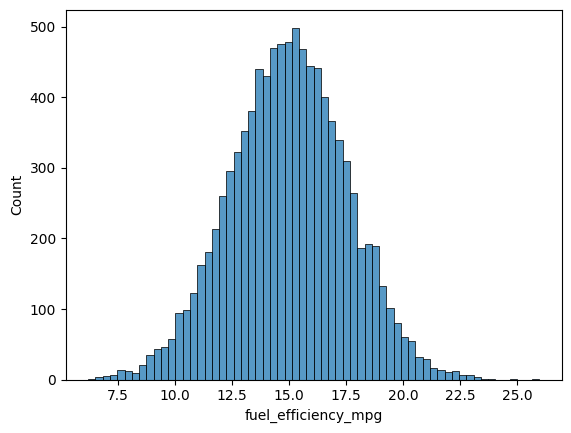

In [112]:
sns.histplot(df.fuel_efficiency_mpg)

In [113]:
n = len(df)
n_val = int(0.2*n)
n_test= int(0.2*n)
n_train = n - n_val - n_test

In [20]:
n

9704

In [114]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [115]:
df_train = df.iloc[: n_train]
df_val = df.iloc[n_train: n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [116]:
index = np.arange(n)

In [117]:
np.random.seed(42)
np.random.shuffle(index)

In [118]:
df_train = df.iloc[index[:n_train]]
df_val = df.iloc[index[n_train: n_train+n_val]]
df_test = df.iloc[index[n_train+n_val:]]

In [119]:
len(df_train), len(df_test), len(df_val)

(5824, 1940, 1940)

In [120]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [121]:
y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']
y_test = df_test['fuel_efficiency_mpg']

In [122]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

## experiement filling na with 0 and mean

In [124]:
mean_hp= int(df_train['horsepower'].mean())
mean_hp

149

In [126]:
df_train_zero = df_train.copy()

In [127]:
df_train['horsepower'] = df_train['horsepower'].fillna(mean_hp)
df_train_zero['horsepower'] = df_train_zero['horsepower'].fillna(0)

In [90]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [128]:
w0, w = train_linear_regression(df_train, y_train)

In [129]:
w0, w

(np.float64(28.924925800828007),
 array([ 0.00012113,  0.01030247, -0.00501007, -0.00023427]))

In [149]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [130]:
y_val_pred = w0 + df_val.dot(w)
rmse(y_val, y_val_pred)

np.float64(0.4536443589628012)

In [132]:
w01, w1 = train_linear_regression(df_train_zero, y_train)

In [133]:
w01, w1

(np.float64(28.82736547365895),
 array([ 9.93613218e-05,  3.54221891e-03, -5.01328015e-03,  3.42992870e-04]))

In [134]:
y_val_pred = w01 + df_val.dot(w1)
rmse(y_val, y_val_pred)

np.float64(0.4968600686648501)

In [142]:
def train_linear_regression_reg(X, y , r=0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [145]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(df_train_zero, y_train, r=r)
    y_pred = w0 + df_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)

0 28.82736547365895 0.4968600686648501
0.01 24.92683841981215 0.49659290515819066
0.1 11.239661084581073 0.4983358451411195
1 1.7315979411219746 0.5019812821189961
5 0.3638075020482907 0.5026673984961557
10 0.18306246621686947 0.5027610856494928
100 0.01841801730688404 0.5028472114782306


In [156]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_results = []

for seed in seed_values:
    np.random.seed(seed)
    np.random.shuffle(index)
    
    df_train = df.iloc[index[:n_train]].copy()
    df_val   = df.iloc[index[n_train:n_train+n_val]].copy()
    df_test  = df.iloc[index[n_train+n_val:]].copy()

    y_train = df_train['fuel_efficiency_mpg']
    y_val   = df_val['fuel_efficiency_mpg']
    y_test  = df_test['fuel_efficiency_mpg']

    X_train = df_train.drop(columns=['fuel_efficiency_mpg'])
    X_val   = df_val.drop(columns=['fuel_efficiency_mpg'])
    X_test  = df_test.drop(columns=['fuel_efficiency_mpg'])

    # Fill missing horsepower
    X_train['horsepower'] = X_train['horsepower'].fillna(0)

    # Train linear regression
    w0, w = train_linear_regression(X_train, y_train)

    # Predict
    y_val_pred = w0 + X_val.dot(w)

    # Compute RMSE
    score = rmse(y_val, y_val_pred)

    # Store RMSE
    rmse_results.append(score)


In [157]:
print(rmse_results)

[np.float64(0.4871152044203206), np.float64(0.4858108800851016), np.float64(0.48877035054800133), np.float64(0.5022264128874183), np.float64(0.4966266531553666), np.float64(0.5159090648577287), np.float64(0.49164252731971847), np.float64(0.4900366040784925), np.float64(0.4874762871050042), np.float64(0.5034004401557377)]


In [159]:
np.std(rmse_results)

np.float64(0.009167654726783072)

## choose seed 9

In [160]:
import numpy as np

seed = 9
np.random.seed(seed)
np.random.shuffle(index)

df_train = df.iloc[index[:n_train]].copy()
df_val   = df.iloc[index[n_train:n_train+n_val]].copy()
df_test  = df.iloc[index[n_train+n_val:]].copy()

# Split features and target
y_train = df_train['fuel_efficiency_mpg']
y_val   = df_val['fuel_efficiency_mpg']
y_test  = df_test['fuel_efficiency_mpg']

X_train = df_train.drop(columns=['fuel_efficiency_mpg'])
X_val   = df_val.drop(columns=['fuel_efficiency_mpg'])
X_test  = df_test.drop(columns=['fuel_efficiency_mpg'])

# Fill missing values
X_train['horsepower'] = X_train['horsepower'].fillna(0)
X_val['horsepower'] = X_val['horsepower'].fillna(0)
X_test['horsepower'] = X_test['horsepower'].fillna(0)

In [162]:
df_full_train = pd.concat([X_train, X_val])

,engine_displacement,horsepower,vehicle_weight,model_year
305,210,158.0,3766.753097,2015
1387,80,134.0,3371.815558,2010
4054,180,167.0,3460.444065,2005
6388,220,129.0,2656.297479,2018
1119,180,101.0,3731.473905,2002
...,...,...,...,...
4667,230,153.0,3582.759453,2006
5383,150,117.0,3105.003763,2021
178,170,177.0,3886.186669,2009
3808,210,156.0,3394.902638,2008


In [163]:
df_full_train = df_full_train.reset_index(drop=True)

In [165]:
y_full_train = np.concatenate([y_train, y_val])

In [166]:
w0, w = train_linear_regression_reg(df_full_train, y_full_train, r=0.001)

In [167]:
y_pred = w0 + X_test.dot(w)

In [168]:
rmse(y_test, y_pred)

np.float64(0.5187103450342053)